In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
Data=pd.read_csv('G:\\Downloads\\consolidated.csv',header=None,names=["Company_share_code","Date","Opening_price","Highest_price","Lowest_price","Close","Volume_traded","Openint"])



In [3]:
Data['Company_share_code']=Data['Company_share_code'].str.replace('.us.txt','')


In [4]:
# data.groupby('Company_share_code')['Volume_traded'].nlargest(100)
# Data=Data.drop('Openint',axis=1)
Data=Data.sort_values('Volume_traded',ascending=False).groupby('Company_share_code').head(10)


In [5]:
Data.head(2)

,Company_share_code,Date,Opening_price,Highest_price,Lowest_price,Close,Volume_traded,Openint
1377705,bac,2012-03-07,7.4073,7.6065,7.3694,7.6065,2423735131,0
2021144,brk-b,2010-02-11,74.5000,76.8000,74.1500,76.6900,2304018600,0


In [ ]:
# The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
# High, Low and Last represent the maximum, minimum, and last price of the share for the day.
# Total Trade Quantity is the number of shares bought or sold in the day and 
# Turnover (Lacs) is the turnover of the particular company on a given date.


In [ ]:
Data.head()

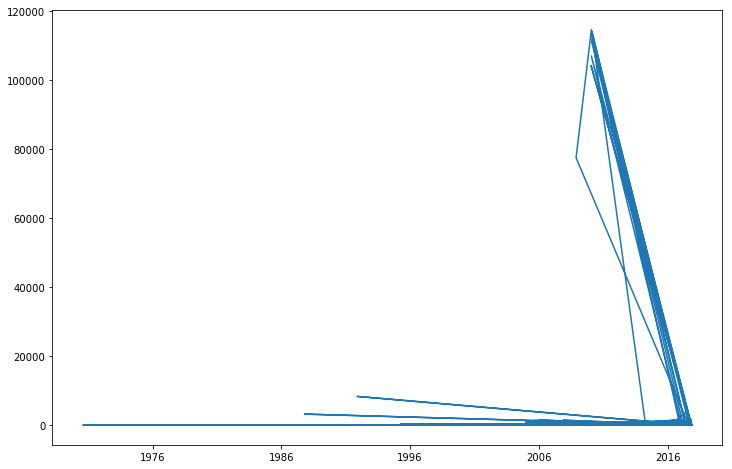

In [6]:
%matplotlib inline
Data['Date']=pd.to_datetime(Data['Date'],format='%Y-%m-%d')
Data.index=Data['Date']
plt.figure(figsize=(12,8))

plt.plot(Data['Close'],label='closing price history')

In [7]:
#feature engineering
from datetime import date
Data['year']=Data['Date'].dt.year
Data['month']=Data['Date'].dt.month
Data['day']=Data['Date'].dt.day
Data.head(5)

,Company_share_code,Date,Opening_price,Highest_price,Lowest_price,Close,Volume_traded,Openint,year,month,day
Date,,,,,,,,,,,
2012-03-07,bac,2012-03-07,7.4073,7.6065,7.3694,7.6065,2423735131,0,2012,3,7
2010-02-11,brk-b,2010-02-11,74.5000,76.8000,74.1500,76.6900,2304018600,0,2010,2,11
2000-09-29,aapl,2000-09-29,1.8058,1.8570,1.6251,1.6496,2069769775,0,2000,9,29
1988-06-30,t,1988-06-30,2.6534,2.6959,2.6534,2.6792,2067132699,0,1988,6,30
2010-02-10,brk-b,2010-02-10,74.5400,74.5900,74.2500,74.4200,1379239200,0,2010,2,10


In [10]:
Data['dayofweek']=Data['Date'].dt.dayofweek

In [ ]:
Data['mon_fri']=0
for i in range(0,len(Data)):
    if (Data['dayofweek'][i]==4 or Data['dayofweek'][i]==0):
        Data['mon_fri'][i]=1
    else:
        Data['mon_fri'][i]=0

In [8]:
Data.head(2)

,Company_share_code,Date,Opening_price,Highest_price,Lowest_price,Close,Volume_traded,Openint,year,month,day
Date,,,,,,,,,,,
2012-03-07,bac,2012-03-07,7.4073,7.6065,7.3694,7.6065,2423735131,0,2012,3,7
2010-02-11,brk-b,2010-02-11,74.5000,76.8000,74.1500,76.6900,2304018600,0,2010,2,11


In [11]:
iv=Data[['Company_share_code','year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']]
dv=Data[['Close']]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,perceptron

LR=LinearRegression()
LogR=LogisticRegression()



In [14]:
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,test_size=0.3,random_state=0)

In [23]:

Scaling=iv_train[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']].head(2)

In [24]:
Scaling.head(2)

,year,month,day,Opening_price,Highest_price,Lowest_price,Volume_traded,dayofweek
Date,,,,,,,,
2009-11-11,2009,11,11,20.018,21.668,19.878,24689296,2
2013-10-04,2013,10,4,13.532,15.830,12.614,22259407,4


In [27]:
from sklearn.preprocessing import MinMaxScaler
Sc=MinMaxScaler(feature_range=(0,1))
iv_train[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']]=Sc.fit_transform(iv_train[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']])
iv_test[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']]=Sc.fit_transform(iv_test[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']])

C:\Users\Vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vijay\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [29]:
iv_test.head(2)

,Company_share_code,year,month,day,Opening_price,Highest_price,Lowest_price,Volume_traded,dayofweek
Date,,,,,,,,,
2016-11-29,bip,0.971429,0.909091,0.933333,0.000276,0.000281,0.000286,0.002104,0.25
2007-05-18,gpic,0.714286,0.363636,0.566667,0.000088,0.000087,0.000087,0.000123,1.00


In [ ]:
# X=data.iloc[:,0].values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder=LabelEncoder()
iv_train.iloc[:,0]=labelencoder.fit_transform(data.iloc[:,0])

#One hot encoding

Onehotencoder=OneHotEncoder(categorical_features=[0])
Onehotencoder.fit_transform(data.iloc[:,0]).toarray()


In [38]:

# iv_train=pd.concat([iv_train[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']]
#                     ,pd.get_dummies(iv_train['Company_share_code'])],axis=1)

iv_test=pd.concat([iv_test[['year','month','day','Opening_price','Highest_price','Lowest_price','Volume_traded','dayofweek']]
                    ,pd.get_dummies(iv_test['Company_share_code'])],axis=1)

In [39]:
iv_test.head(2)

,year,month,day,Opening_price,Highest_price,Lowest_price,Volume_traded,dayofweek,a,aa,...,zoes,zsan,zto,ztr,zts,zumz,zvv,zx,zyme,zyne
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-29,0.971429,0.909091,0.933333,0.000276,0.000281,0.000286,0.002104,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-18,0.714286,0.363636,0.566667,0.000088,0.000087,0.000087,0.000123,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import svm
svm=svm.SVR().fit(iv_train,dv_train)
y_pred_svm=svm.predict(iv_test)

In [44]:
iv_test.shape

(21343, 6936)

In [41]:
LR.fit(iv_train,dv_train)
y_pred_LR=LR.predict(iv_test)
# from sklearn import preprocessing
# lab_enc = preprocessing.LabelEncoder()
# dv_train_encoded=lab_enc.fit_transform(dv_train)
# iv_train_encoded=lab_enc.fit_transform(iv_train)
# y_pred_LogR=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(iv_train,dv_train_encoded)
# y_pred_LogR_pred=y_pred_LogR.predict(iv_test)

MemoryError: 

In [ ]:
# #calculating RMSE
# import numpy as np
# from sklearn.metrics import mean_squared_error
# print(np.sqrt(mean_squared_error(dv_test,y_pred_LR)))

In [ ]:
def rmse(pred,target):
    diff=pred-target
    diff_sq=diff**2
    mean_diff_sq=diff_sq.mean()
    rmse_val=np.sqrt(mean_diff_sq)
    return rmse_val

In [ ]:
print('RMSE for logistic regression',rmse(dv_test,y_pred_LogR.predict(iv_test)),'RMSE for SVR',rmse(dv_test,y_pred_svm),'RMSE for LR',rmse(dv_test,y_pred_LR))

In [ ]:
import seaborn as sns
sns.scatterplot(y_pred_LR,dv_test,hue=y_pred_LR)

In [ ]:
correlation = data.corr(method='pearson')
print(correlation)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, iv_train, dv_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(iv_train)
rescaled_X_train = scaler.transform(iv_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, dv_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(iv_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(dv_test, predictions))

In [ ]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : dv_test})
compare.head(100)

In [ ]:
Onehotencoder.fit_transform(iv).toarray()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(categorical_features = [0])
X=enc.fit_transform(X).toarray()

